In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from scipy import stats

In [ ]:
# Import warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mengakses file dari drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# Mengakses file dataset
file_path = '/content/drive/MyDrive/SQL/olist-final-projects.csv'

olist = pd.read_csv(file_path)

# Preview dataset
olist.head()

,order_id,product_id,customer_id,category,price,payment_type,review_score,time_purchased,order_status,city,state
0,e17e4f88e31525f7deef66779844ddce,1e9e8ef04dbcff4541ed26657ea517e5,f8a3e963a310aa58b60a5b1fed5bceb5,perfumery,10.91,debit_card,5.0,2018-04-24 16:16:53,delivered,mogi-guacu,SP
1,5236307716393b7114b53ee991f36956,3aa071139cb16b67ca9e5dea641aaa2f,03fc97548af8f58fefc768d12b546c9c,art,248.00,voucher,5.0,2018-01-31 18:55:36,delivered,rio de janeiro,RJ
2,01f66e58769f84129811d43eefd187fb,96bd76ec8810374ed1b65e291975717f,e41819d1c95c12c9ce495b630eab8aee,sports_leisure,79.80,credit_card,5.0,2018-07-09 21:18:01,delivered,sao paulo,SP
3,143d00a4f2dde4e0364ee1821577adb3,cef67bcfe19066a932b7673e239eb23d,322162b5ca010c2b059cb5224dd818b1,baby,112.30,credit_card,1.0,2018-08-03 08:55:50,delivered,sao paulo,SP
4,86cafb8794cb99a9b1b77fc8e48fbbbb,9dc1a7de274444849c219cff195d0b71,c11c31965ff02cc1d7132df8edfcbc22,housewares,37.90,credit_card,5.0,2018-04-11 01:06:37,delivered,sao paulo,SP


In [ ]:
# Display maksimum kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Ekstrak ukuran data
nrows, ncols = olist.shape

print(f"Data Input : ({nrows}, {ncols}) - (#jumlah observasi, #jumlah fitur)")

Data Input : (115723, 11) - (#jumlah observasi, #jumlah fitur)


Dapat dilihat bahwa di dalam dataset terdapat 115.723 observasi, dengan 11 kolom

In [ ]:
# Cek informasi umum dari data
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115723 entries, 0 to 115722
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        115723 non-null  object 
 1   product_id      115723 non-null  object 
 2   customer_id     115723 non-null  object 
 3   category        114062 non-null  object 
 4   price           115723 non-null  float64
 5   payment_type    115720 non-null  object 
 6   review_score    114862 non-null  float64
 7   time_purchased  115723 non-null  object 
 8   order_status    115723 non-null  object 
 9   city            115723 non-null  object 
 10  state           115723 non-null  object 
dtypes: float64(2), object(9)
memory usage: 9.7+ MB


Dapat dilihat bahwa pada dataset, terdapat null value pada kolom category dan review_score. Dapat dilihat pula jika time_purchased masih berbentuk object, yang mana seharusnya berbentuk date-time

In [ ]:
# Cek data duplikat

olist.duplicated().any()

True

In [ ]:
# Menghilangkan data duplikat

olist = olist.drop_duplicates(keep='first')

olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102695 entries, 0 to 115722
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        102695 non-null  object 
 1   product_id      102695 non-null  object 
 2   customer_id     102695 non-null  object 
 3   category        101230 non-null  object 
 4   price           102695 non-null  float64
 5   payment_type    102694 non-null  object 
 6   review_score    101984 non-null  float64
 7   time_purchased  102695 non-null  object 
 8   order_status    102695 non-null  object 
 9   city            102695 non-null  object 
 10  state           102695 non-null  object 
dtypes: float64(2), object(9)
memory usage: 9.4+ MB


Setelah dilakukan pengecekan terhadap data duplikat, data yang tersisa ada 7751 entries

In [ ]:
# Cek missing value

olist.isna().any().sum()

3

Terdapat tiga kolom dengan missing value

In [ ]:
# Mencari kolom dengan missing value
col_missing = []

for col in olist.columns:
  if olist[col].isna().any() == True:
    col_missing.append(col)

col_missing

['category', 'payment_type', 'review_score']

Kolom dengan missing value adalah kolom `category`, `payment_type` dan `review_score`


In [ ]:
# Mendapatkan persentase jumlah missing value tiap kolom
nan_col = olist.isna().sum().sort_values (ascending=False) # Jumlah missing value per kolom

n_data = len (olist)

percent_nan_col = (nan_col/n_data) * 100 # Besar persentase
percent_nan_col

category          1.426554
review_score      0.692341
payment_type      0.000974
order_id          0.000000
product_id        0.000000
customer_id       0.000000
price             0.000000
time_purchased    0.000000
order_status      0.000000
city              0.000000
state             0.000000
dtype: float64

*Entry dengan missing value pada category dan payment_type dihapus karena tidak mungkin untuk mengimputasi menggunakan median, modus, atau mean sebab kategori produk bisa sangat spesifik; dan dikarenakan jumlahnya tidak terlalu banyak sehingga tidak akan terlalu mempengaruhi keseluruhan dataset*

In [ ]:
# Menghapus entry yang memiliki missing value pada 'category'

olist = olist.dropna(subset=['category'])

In [ ]:
# Menghapus entry yang memiliki missing value pada 'payment_type'

olist = olist.dropna(subset=['payment_type'])

*Selanjutnya menginput missing value pada review score dengan median yang ada pada tiap product category sehingga tidak terlalu jauh dengan category-nya*

In [ ]:
# Mengganti missing review_score dengan median pada tiap product category


med_review = olist.groupby('category')['review_score'].median() # Mengkalkulasi median tiap kategori

med_review_dict = dict(med_review) # Menyimpan kalkulasi median tiap kategori

def impute_median(row): # Function untuk memasukan pada missing value
    if pd.isnull(row['review_score']):
        return med_review_dict[row['category']]
    else:
        return row['review_score']

olist['review_score'] = olist.apply(impute_median, axis=1) # Menjalankan function

olist.info() # Melihat info dataset setelah dilakukan manipulasi data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101229 entries, 0 to 115722
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        101229 non-null  object 
 1   product_id      101229 non-null  object 
 2   customer_id     101229 non-null  object 
 3   category        101229 non-null  object 
 4   price           101229 non-null  float64
 5   payment_type    101229 non-null  object 
 6   review_score    101229 non-null  float64
 7   time_purchased  101229 non-null  object 
 8   order_status    101229 non-null  object 
 9   city            101229 non-null  object 
 10  state           101229 non-null  object 
dtypes: float64(2), object(9)
memory usage: 9.3+ MB


Selanjutnya akan dilakukan data cleansing untuk inconsistent format

***Cleansing pada kolom `category`***

In [ ]:
# List entry unik kategori

olist['category'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

In [ ]:
# Dictionary untuk revisi entry kategori

revisi_category = {
    'telephony' : 'telephone',
    'home_confort' : 'home_comfort',
    'costruction_tools_garden' : 'construction_tools_garden',
    'fashio_female_clothing' : 'fashion_female_clothing',
    'home_appliances_2' : 'home_appliances',
    'costruction_tools_tools' : 'construction_tools_tools',
    'home_comfort_2' : 'home_comfort'
}

# Melakukan revisi

olist['category'] = olist['category'].replace(revisi_category)

olist['category'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephone', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'construction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical', 'party_supplies

In [ ]:
# Mengganti "_" dengan spasi " "
olist['category'] = olist['category'].str.replace('_', ' ')

olist['category'].unique()

array(['perfumery', 'art', 'sports leisure', 'baby', 'housewares',
       'musical instruments', 'cool stuff', 'furniture decor',
       'home appliances', 'toys', 'bed bath table',
       'construction tools safety', 'computers accessories',
       'health beauty', 'luggage accessories', 'garden tools',
       'office furniture', 'auto', 'electronics', 'fashion shoes',
       'telephone', 'stationery', 'fashion bags accessories', 'computers',
       'home construction', 'watches gifts',
       'construction tools construction', 'pet shop', 'small appliances',
       'agro industry and commerce', 'furniture living room',
       'signaling and security', 'air conditioning', 'consoles games',
       'books general interest', 'construction tools tools',
       'fashion underwear beach', 'fashion male clothing',
       'kitchen dining laundry garden furniture',
       'industry commerce and business', 'fixed telephony',
       'construction tools lights', 'books technical', 'party supplies

***Cleansing untuk `payment_type`***

In [ ]:
# Mengganti "_" dengan spasi " "
olist['payment_type'] = olist['payment_type'].str.replace('_', ' ')

# List entry unik payment_type
olist['payment_type'].unique()

array(['debit card', 'voucher', 'credit card', 'boleto'], dtype=object)

***Cleansing untuk `city`***

In [ ]:
# List entry unik city
olist['city'].unique()

array(['mogi-guacu', 'rio de janeiro', 'sao paulo', ..., 'mutunopolis',
       'itutinga', 'campo florido'], dtype=object)

***Cleansing untuk `state`***

In [ ]:
# List entry unik state
olist['state'].value_counts()

SP    42551
RJ    12961
MG    11912
RS     5596
PR     5141
SC     3695
BA     3449
DF     2188
ES     2101
GO     2047
PE     1657
CE     1339
PA      983
MT      942
MA      750
MS      731
PB      540
RN      501
PI      498
AL      411
SE      347
TO      292
RO      254
AM      151
AC       81
AP       72
RR       39
Name: state, dtype: int64

***Mengubah data type string menjadi datetime***

In [ ]:
# Mengubah menjadi datetime
olist['time_purchased'] = pd.to_datetime(olist['time_purchased'])

# Mengecek dataset
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101229 entries, 0 to 115722
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        101229 non-null  object        
 1   product_id      101229 non-null  object        
 2   customer_id     101229 non-null  object        
 3   category        101229 non-null  object        
 4   price           101229 non-null  float64       
 5   payment_type    101229 non-null  object        
 6   review_score    101229 non-null  float64       
 7   time_purchased  101229 non-null  datetime64[ns]
 8   order_status    101229 non-null  object        
 9   city            101229 non-null  object        
 10  state           101229 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 9.3+ MB


***Exploratory Data Analysis***

**Top Product Category**

In [ ]:
#Filter kategori yang paling banyak terjual
sorted_category = olist['category'].value_counts().sort_values(ascending=False) # Mengurutkan data berdasarkan jumlah item yang terjual
top_category = sorted_category[:20].sort_values(ascending=False) # Memfilter data 20 teratas
olist_top_category = olist[olist['category'].isin(top_category.index)] # Membuat dataframe untuk data 20 teratas

In [ ]:
#Filter kategori dengan penjualan paling besar
category_sales = olist.groupby('category')['price'].sum().sort_values(ascending=False) # Menghitung dan mengurutkan data berdasarkan besar penjualan
top_category_sales = category_sales[:20] # Memfilter data 20 teratas

olist_top_sales = olist[olist['category'].isin(top_category_sales.index)] # Membuat dataframe untuk data 20 teratas

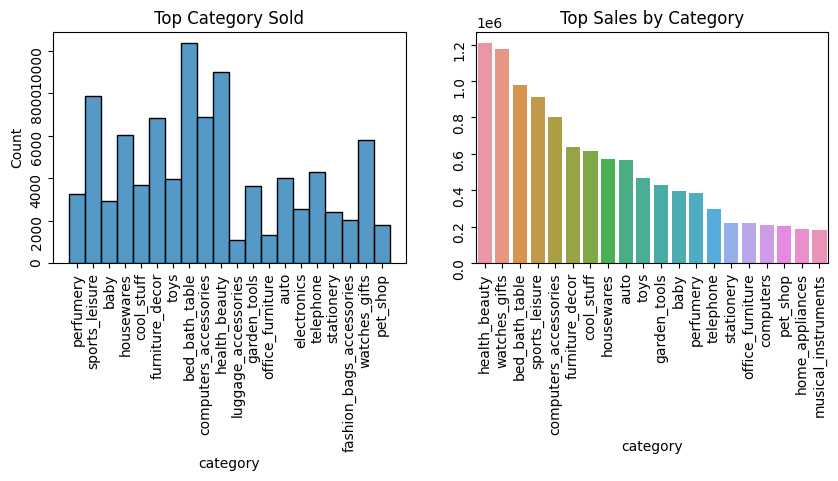

In [ ]:
# Untuk mengatur jumlah subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Untuk membuat histogram kategori yang paling banyak terjual
sns.histplot(data=olist_top_category, x='category', bins=len(top_category), ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Top Category Sold")

# Untuk membuat barplot kategori dengan penjualan paling besar
sns.barplot(data=olist_top_sales, x=top_category_sales.index, y=top_category_sales.values, ax=ax[1])
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Top Sales by Category")

plt.show()

**Sales trend by year**

In [ ]:
# Membuat index datetime dan dataframe baru berdasarkan tahun

olist.set_index('time_purchased', inplace=True)

olist_2017 = olist.loc['2017']
olist_2018 = olist.loc['2018']

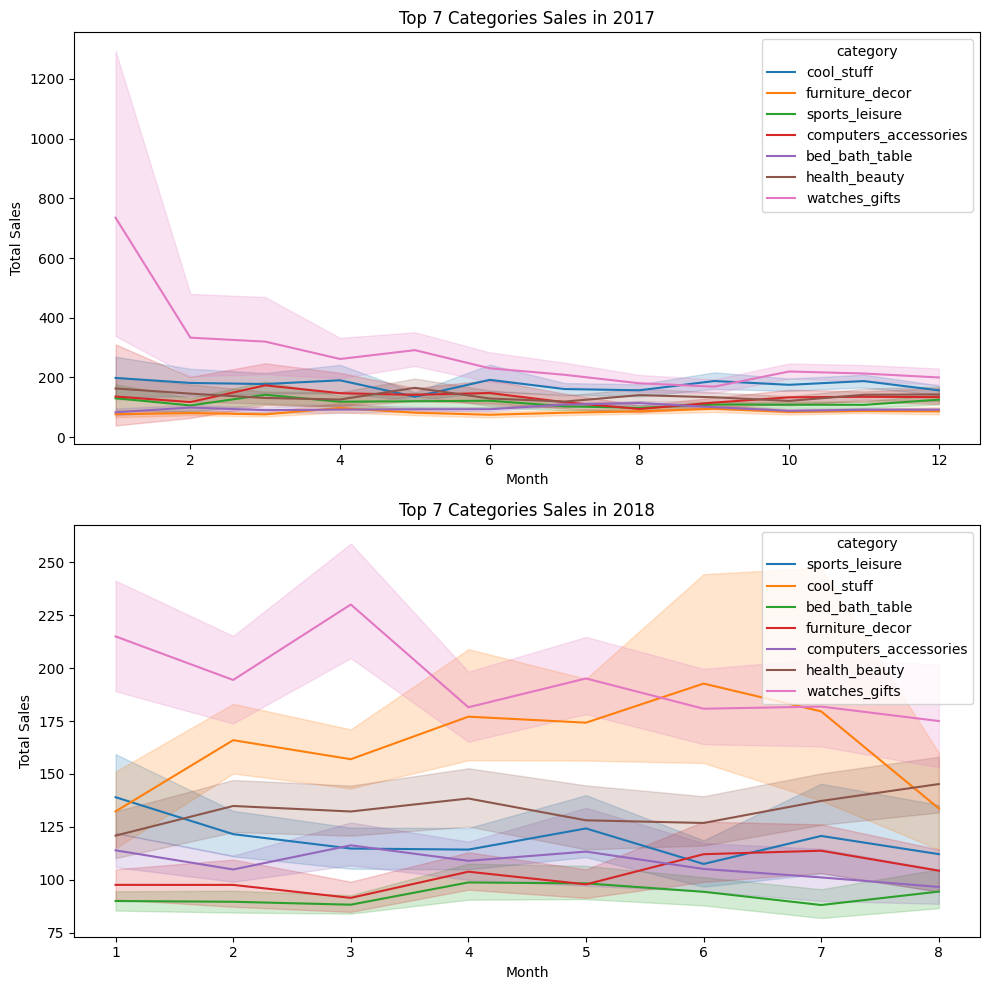

In [ ]:
# Mengatur jumlah plot 
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot time series untuk tahun 2017, dan 2018
for i, year in enumerate([olist_2017, olist_2018]):
    top_category_sales = category_sales[:7]
    year_top_category_sales = year[year['category'].isin(top_category_sales.index)]
    sns.lineplot(data=year_top_category_sales, x=year_top_category_sales.index.month, y='price', hue='category', ax=ax[i])
    ax[i].set_title('Top 7 Categories Sales in {}'.format(year.index.year[0]))
    ax[i].set_xlabel('Month')
    ax[i].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

**Correlation between top category and top city**

In [ ]:
# Filter data top 15 dari 'category' dan 'city' 
top_category = olist['category'].value_counts().nlargest(15).index
top_city = olist['city'].value_counts().nlargest(15).index

In [ ]:
# Membuat dataframe baru berdasarkan top category dan top city
olist_city_category = olist.loc[olist['category'].isin(top_category) & olist['city'].isin(top_city)]

In [ ]:
# Membuat pivot table
pivot_table = olist_city_category.pivot_table(index='category', columns='city', values='price', aggfunc='sum')

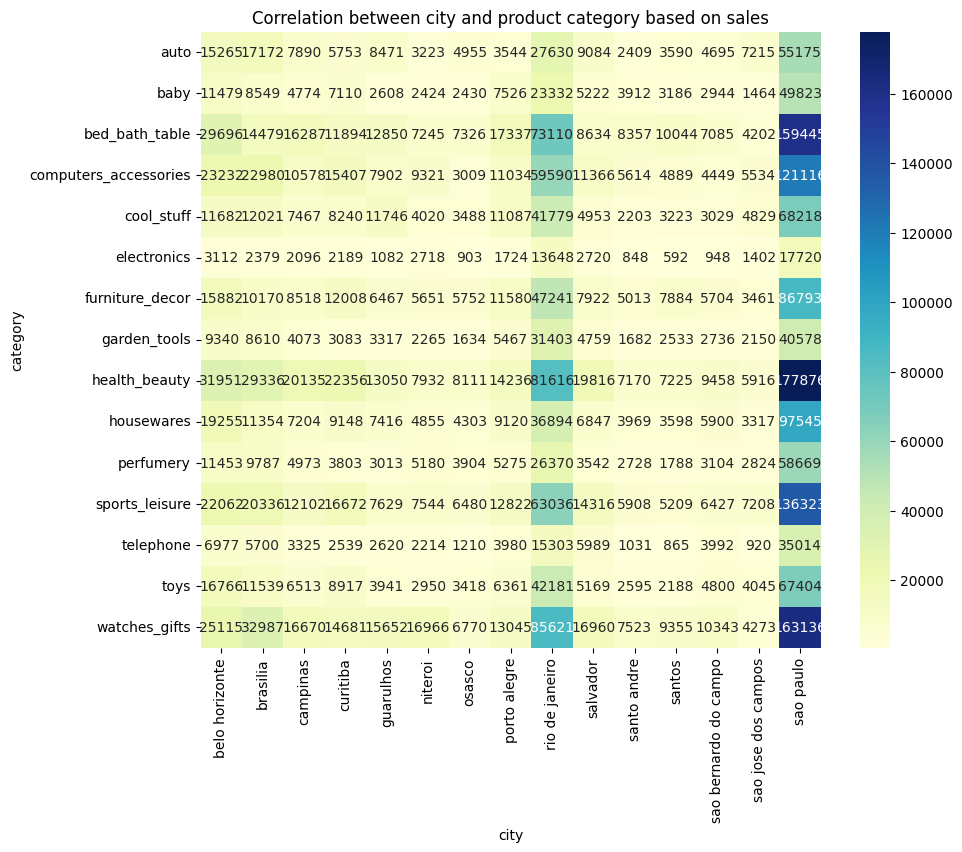

In [ ]:
# Mengatur ukuran plot
fig, ax = plt.subplots(figsize=(10,8))

# Membuat plot heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f', ax=ax)
ax.set_title('Correlation between city and product category based on sales')

plt.show()

In [ ]:
# Mendowload dataset yang telah dibersihkan
olist.to_csv('/content/drive/MyDrive/SQL/olist-final-projects-cleaned.csv', index=False)

from google.colab import files
files.download('/content/drive/MyDrive/SQL/olist-final-projects-cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>